In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

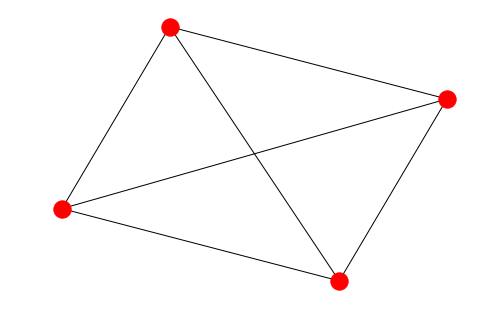

In [8]:
tetraedro = np.ones((4,4))
for i in range(4):
    tetraedro[i,i]=0

tetraedroG = nx.Graph(tetraedro)
nx.draw(tetraedroG)

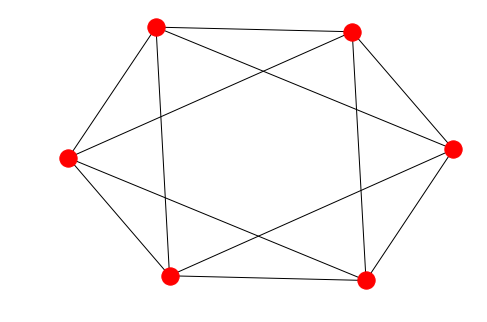

In [30]:
octaedro = np.zeros((6,6))
for i in range(6):
    octaedro[i, (i+1)%6] = 1
    octaedro[i, (i+2)%6] = 1

octaedroG = nx.Graph(octaedro)
nx.draw(octaedroG)

In [45]:
s = np.random.rand(100).reshape((10,10))
print(s)

[[0.4991194  0.66879788 0.08578887 0.44052039 0.36915778 0.02791802
  0.84888011 0.12708764 0.28396771 0.61264841]
 [0.38393266 0.04844558 0.96590812 0.26385963 0.47693342 0.23122747
  0.98989475 0.49121944 0.22378251 0.49284488]
 [0.44300142 0.65214219 0.96380501 0.9494503  0.64976434 0.95995188
  0.22970233 0.14472974 0.61995645 0.54611304]
 [0.47843258 0.85227062 0.77424451 0.10440543 0.10528835 0.04988557
  0.86921847 0.05975623 0.9712304  0.80247158]
 [0.71059076 0.24679375 0.92811009 0.68002419 0.76253361 0.73774352
  0.85793549 0.70417089 0.7911828  0.86398627]
 [0.68575758 0.85821057 0.78315485 0.97400302 0.83182995 0.1576404
  0.69900778 0.33872279 0.19653186 0.78581588]
 [0.70375136 0.3991878  0.94011401 0.41834903 0.06422294 0.56679844
  0.75770926 0.28190412 0.62802616 0.01301588]
 [0.69133145 0.24570819 0.10319145 0.93255307 0.9718256  0.94722116
  0.53610998 0.59732465 0.15818815 0.65305534]
 [0.58206589 0.44326932 0.18962273 0.39475105 0.14641901 0.82223844
  0.61543158 

In [41]:
s[s>.5]=1
s[s<=.5]=0
s

array([[1., 0., 0., 1., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 1., 1., 0., 1., 1., 1.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 1., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0., 0., 1., 1., 1.],
       [1., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1., 0., 1., 0.]])

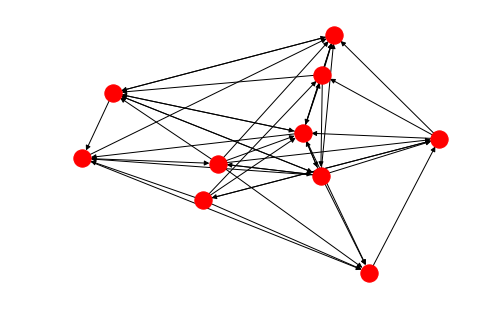

In [44]:
sG = nx.DiGraph(s)
nx.draw(sG)

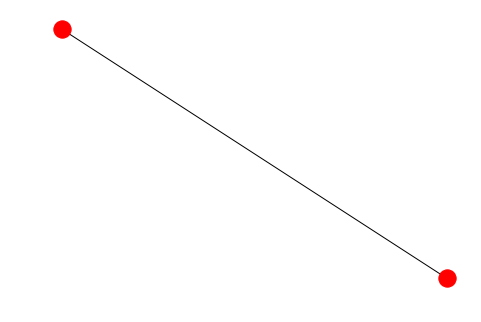

In [49]:
l = np.zeros((2,2))
l[0,1]=1
l[1,0]=1
lG = nx.Graph(l)
nx.draw(lG)

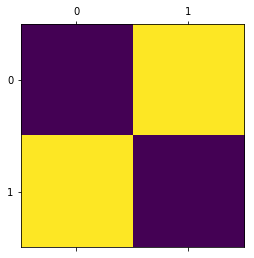

In [50]:
plt.matshow(l)

Gráfica: La `gráfica` G es una pareja de conjuntos V y E, se denota G(V,E). V es el conjunto de `nodos` y puede representar lo que sea, individuos, computadoras, escuelas, ideas. E es el conjunto de las `aristas`, es decir, *parejas* de nodos (parejas de elementos de V).

Si importa el orden de las parejas de elementos en las aristas de E, se dice que es una `gráfica dirijida` o `Digráfica`. Es decir, si a y b son nodos, (a,b) es una arista y (b,a) es otra. También se le llaman *flechas*.

Si no importa el orden en las parejas de E, se llama simplemente `gráfica` o `gráfica no dirijida`. Es decir, (a,b) es la misma arista que (b,a). 

Los nodos se suelen *representar* con circulos pequeños o puntos. Las aristas dirigidas, se representan con flechas que unen los nodos.

Las aristas no dirigidas se representan con segmentos o curvas que unen los nodos.

Un `matriz de adyacencia`, es una forma de representar a una gráfica (dirigida o no) en una computadora. Es útil para observar sus propiedades y es muy rápida, aunque ocupa mucho espacio.

Una matriz M de adyacencia indica que los nodos i y j son `adyacente` o sea, se conectan, ssi M[i, j]=1  (arista dirigida) o  M[i, j] = M[j, i] = 1  (arista no dirijida). M[i, j] = 0 ssi i y j no están conectados, no son adyacentes, no son vecinos etc. Ej. Si los nodos 3 y 4 tienen una arista no dirigida entre ellos, entonces M[3,4]=M[4,3]=1.

Un `loop, ciclo o lazo`, es una arista que conecta a un nodo con sigo mismo.

Una `arista paralela` a otra, es una segunda arista conectando los mismos dos nodos de la otra.

Una gráfica es `simple` si NO TIENE lazos ni aristas paralelas.



Teorema. *Si M es una matriz que representa una gráfica no dirigida, entonces es simétrica.*

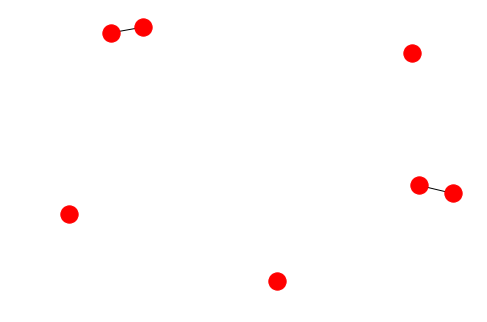

In [57]:
def grafica_aleatoria(n, p):
    """
    Gráfica (no dirigida) aleatoria de tamaño
    (número de nodos) n y probabilidad de conexión p.
    Gráficas de Erdos - Renyi.
    """
    M = np.zeros((n,n), dtype=int)
    for i in range(n-1):
        for j in range(i+1, n):
            if np.random.rand(1) < p:
                M[i,j]=1
    return M + M.T

nx.draw(nx.Graph(grafica_aleatoria(7, 1/6)))

Una `ruta o camino` en una gráfica, es una colección ordenada $v_0e_0v_1e_1v_2e_2...e_{k-1}v_k$ de nodo-arista-nodo-arista...-arista-nodo.

La ruta es `simple` si $v_i\neq v_j$ $\forall i\neq j$  (nunca vuelve a pasar por el mismo vértice).

Una ruta forma un `ciclo` si $v_0=v_k$.

... poner def de camino euleriano ...

Una gráfica es `conexa` si $\forall i,j$ tal que $i\neq j$, tenemos que existe una ruta de $v_i$ a $v_j$. (Entre cualesquiera dos nodos siempre se puede encontrar una ruta).



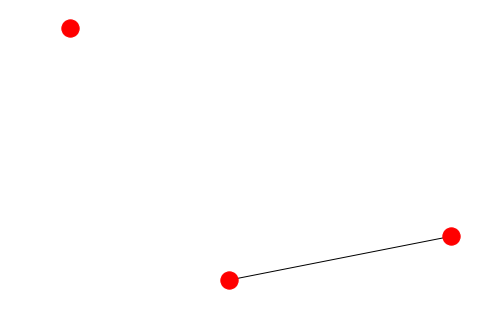

In [71]:
nx.draw(nx.Graph(grafica_aleatoria(3, .5)))

Se llama `subgráfica` de G(V,E) a la gráfica H(U,F), donde $U\subset V$, $F\subset E$ tal que si $(a,b)\in F$ entonces $a\in U$ y $b\in U$  (Los nodos de la subgráfica son algunos de la gráfica. Y si una arista está en la subgráfica, sus extremos también).

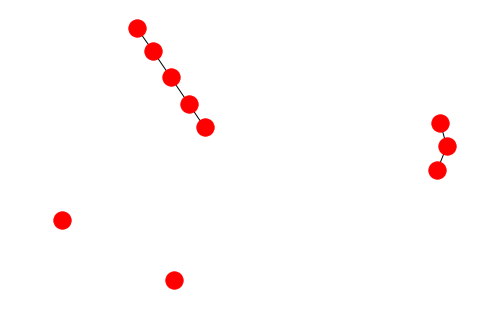

In [84]:
nx.draw(nx.Graph(grafica_aleatoria(10, .2)))

Una subgráfica conexa es *maximal respecto a ser conexa* (es decir, que si le agrego un nodo más y las aristas para llegar a él, si existieran en la gráfica original, ya no sería conexa), se le llama `isla` o `componente conexa`.

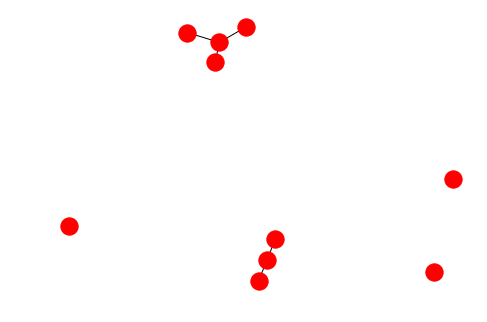

In [85]:
nx.draw(nx.Graph(grafica_aleatoria(10, .2)))

Una gráfica es `completa` si $\forall a,b \in V$, $(a,b)\in E$  (Todos sus nodos se conectan entre si con una arista).

Un `clique` es una sugráfica completa.

Una gráfica es `plana` si tiene una forma de dibujar de manera que no se crucen sus aristas.

Teorema. *Una gráfica es plana ssi no tiene a $K_{3,3}$ o a $K_5$ como subgráficas.*